#Analise Exploratoria Avançada

## Preparando o ambiente

Importando as bibliotecas necessárias para a análise

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive

Conectando conta google

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Buscando as bases na conta google

In [ ]:
caminho_acessos_eventos_2023 = '/content/drive/Shareddrives/M10_SI/acessos_eventos_2023.csv'
caminho_acessos_fontes_2023 = '/content/drive/Shareddrives/M10_SI/acessos_fontes_2023.csv'
caminho_acessos_geral_2023 = '/content/drive/Shareddrives/M10_SI/acessos_geral_2023.csv'
caminho_age_sessions_big_numbers_2023 = '/content/drive/Shareddrives/M10_SI/age_sessions_big_numbers_2023.csv'
caminho_country_city_views_big_numbers_2023 = '/content/drive/Shareddrives/M10_SI/country_city_views_big_numbers_2023.csv'
caminho_ga_universal_2023 = '/content/drive/Shareddrives/M10_SI/ga_universal_2023.csv'
caminho_google_ads_2023 = '/content/drive/Shareddrives/M10_SI/google_ads_2023.csv'
caminho_hour_users_big_numbers_2023 = '/content/drive/Shareddrives/M10_SI/hour_users_big_numbers_2023.csv'
caminho_users_country_big_numbers_geo_2023 = '/content/drive/Shareddrives/M10_SI/users_country_big_numbers_geo_2023.csv'
caminho_week_users_big_numbers_2023 = '/content/drive/Shareddrives/M10_SI/week_users_big_numbers_2023.csv'
caminho_hubspot_crm_exports_all_contacts_2024 = '/content/drive/Shareddrives/M10_SI/hubspot-crm-exports-all-contacts-2024-04-18.xlsx - All contacts.csv'

## Compreensão dos dados

Na tabela abaixo são mostrados os dados dos logs da Landing Page da Pearson. Na primeira coluna 'Event name' são as ações que os usuários performam, e na segunda coluna 'Event count', a quantidade de vezes que essas ações acontecem. Esses dados nos fornem informações muito importantes sobre o comportamento dos usuários na página. A linha de 'first_visit', por exemplo, nos mostra o número de usuários únicos na página, e se subtrairmos pelo valor de 'page_view', obtemos o número de usuários que voltaram para a página.


In [ ]:
df_acessos_eventos_2023 = pd.read_csv(caminho_acessos_eventos_2023)
df_acessos_eventos_2023

,Event name,Event count
0,carregamento_pagina,22538287
1,page_view,2299685
2,session_start,2012375
3,first_visit,1402714
4,user_engagement,412624
5,scroll,234792
6,interaction,161115
7,lead_enviado,74449
8,form_start,70077
9,play_video,65675


In [ ]:
df_acessos_fontes_2023 = pd.read_csv(caminho_acessos_fontes_2023)
df_acessos_fontes_2023

,Operating system,Event count
0,Android,24814051
1,iOS,3466762
2,Windows,990519
3,Linux,128601
4,Chrome OS,36199
5,Macintosh,35764
6,(not set),4747
7,Tizen,333
8,BlackBerry,9
9,Playstation 4,9


Na tabela abaixo temos as estatísticas dos números de usuários ativos, número de sessões e número de conversões dos diferentes endpoints do site da wizard. Esses dados podem nos fornecer insights valiosos sobre quais promoções e propagandas geram mais tráfego para o site, e quais tem maior número de conversões. Com isso, podem calcular a taxa de conversão dos sites dividindo o número total de conversões pelo número total de sessões.

In [ ]:
df_acessos_geral_2023 = pd.read_csv(caminho_acessos_geral_2023)
df_acessos_geral_2023

,Hostname,Page path and screen class,Active users,Sessions,Conversions
0,promocoes.wizard.com.br,/wizard-on/,628757,1024172,8329
1,promocoes.wizard.com.br,/compromisso-de-aprendizado/,416303,482652,43308
2,promocoes.wizard.com.br,/curso-express/,306254,399427,4392
3,promocoes.wizard.com.br,/bolsa-de-estudo/,46683,51178,2554
4,promocoes.wizard.com.br,/curso-express/agradecimento,32591,35025,8024
5,promocoes.wizard.com.br,/wizard-on/agradecimento,26599,29461,37097
6,promocoes.wizard.com.br,/matricula-zero/,22720,24415,0
7,promocoes.wizard.com.br,/wizard-on-promo/,19052,23859,877
8,promocoes.wizard.com.br,/bolsa-de-estudo/agradecimento,15592,16523,27803
9,promocoes.wizard.com.br,/blue-friday/,4942,5421,0



A tabela abaixo resume as sessões de uso divididas por faixas etárias. A maior parte das sessões, mais de 1,5 milhão, está categorizada como "desconhecida", indicando uma falta significativa de dados sobre a idade dos usuários. Entre as faixas etárias conhecidas, a predominância está com os usuários entre 18 e 24 anos, seguidos pelos de 25 a 34 anos, mostrando que a plataforma ou serviço é mais popular entre jovens adultos. As sessões diminuem progressivamente com o aumento da idade, com o menor número registrado entre os usuários de 65 anos ou mais, sugerindo uma aderência ou atração menor entre o público mais velho.

In [ ]:
df_age_sessions_big_numbers_2023 = pd.read_csv(caminho_age_sessions_big_numbers_2023)
df_age_sessions_big_numbers_2023

,Age,Sessions
0,unknown,1509472
1,18-24,175969
2,25-34,134545
3,35-44,88545
4,45-54,55278
5,55-64,35077
6,65+,22822


Na tabela abaixo podemos ver o número de visualizações que a Landing Page da Wizard teve em cada cidade e país. Esses dados mostram as cidades em que a wizard tem mais e menos usuários. Esses dados podem ser úteis para medir regiões para onde expandir e testar a eficácia de campanhas de marketing em diferentes regiões.

In [ ]:
df_country_city_views_big_numbers_2023 = pd.read_csv(caminho_country_city_views_big_numbers_2023)
df_country_city_views_big_numbers_2023

,Country,City,Views
0,Brazil,(not set),286492
1,Brazil,Sao Paulo,204149
2,Brazil,Rio de Janeiro,104473
3,Brazil,Belo Horizonte,48345
4,Brazil,Salvador,47408
...,...,...,...
2279,United Kingdom,Wembley,0
2280,United States,West Lafayette,0
2281,United States,Weymouth,0
2282,Japan,Yawatahama,0


A tabela abaixo destaca o engajamento dos usuários com o site da Wizard. A página principal, "Wizard On", domina em termos de usuários e sessões, indicando que é a porta de entrada principal para muitos visitantes. As outras páginas com alto engajamento incluem ofertas específicas como matrículas com benefícios e cursos express, mostrando que promoções e cursos intensivos são atraentes para o público. As páginas menos visitadas parecem ser locais específicos das escolas, com baixo ou nenhum engajamento, o que pode sugerir uma menor relevância online ou problemas na captação de dados dessas páginas específicas.

In [ ]:
df_ga_universal_2023 = pd.read_csv(caminho_ga_universal_2023)
df_ga_universal_2023

,Page Title,Users,Sessions
0,Wizard On,85604,94025
1,Compromisso de Aprendizado | Wizard,30847,35638
2,Matricule-se e ganhe R$ 500 para viajar - Wizard,28300,31103
3,Curso Express - Wizard,28244,31003
4,▷ Curso de Inglês: [Conquiste Sua Fluência] em...,10822,10844
...,...,...,...
196,"Escola de Idiomas em Araucaria, Centro, PR - W...",11,0
197,Promoções – Wizard Nova Parnamirim,11,0
198,Teste de Inglês: Conclusão - Wizard Idiomas [u...,11,0
199,"Escola de Idiomas em Goiania, Setor Fazenda Ca...",11,0


A tabela abaixo fornece uma visão comparativa entre duas campanhas publicitárias da Wizard, uma no Google Search e outra no YouTube, ambas com status "Eligible". A campanha do Google mostra um desempenho robusto, com 136,185 interações e cliques, e uma significativa conversão de 17,611.47, destacando uma taxa de conversão de cliques de 0.12932 e um custo médio por clique (Avg. CPC) de $7.49. Em contrapartida, a campanha no YouTube não registrou interações, cliques ou conversões, indicando uma falta de engajamento que contrasta fortemente com o sucesso da campanha no Google, sugerindo que a abordagem ou o conteúdo da campanha no YouTube pode necessitar de revisão para melhorar seu desempenho.

In [ ]:
df_google_ads_2023 = pd.read_csv(caminho_google_ads_2023)
df_google_ads_2023

,Campaign,Campaign status,Interactions,Conversions,Clicks,Click conversion rate,Avg. CPC,Avg. CPV
0,[Wizard ON] Google | Search | Help me Buy | Cu...,Eligible,136185,17611.474371,136185,0.12932,7.490369,0
1,[wizard on] youtube | tráfego | help me choose...,Eligible,0,0.000000,0,0.00000,0.000000,0



A tabela abaixo apresenta a atividade dos usuários no site ao longo das horas do dia, medida em número de usuários ativos por hora. Os picos de atividade são observados nas horas da noite, especificamente às 20h com 143,411 usuários, seguido por 19h e 21h. A atividade diminui gradualmente após este período e atinge seu ponto mais baixo nas primeiras horas da manhã, com o menor número de usuários ativos às 4h.

In [ ]:
df_hour_users_big_numbers_2023 = pd.read_csv(caminho_hour_users_big_numbers_2023)
df_hour_users_big_numbers_2023

,Hour,Active users
0,20,143411
1,19,137369
2,21,134477
3,18,126677
4,22,122786
5,17,110903
6,15,105937
7,16,105622
8,14,104875
9,13,101974


As tabelas abaixo mostram os numeros de acessos de usuarios por semana e também por país

In [ ]:
df_users_country_big_numbers_geo_2023 = pd.read_csv(caminho_users_country_big_numbers_geo_2023)
df_users_country_big_numbers_geo_2023

,Country,Active users
0,Brazil,1434957
1,United States,5879
2,Indonesia,2247
3,Hungary,968
4,Germany,909
...,...,...
120,Sri Lanka,1
121,São Tomé & Príncipe,1
122,Togo,1
123,Trinidad & Tobago,1


In [ ]:
df_week_users_big_numbers_2023 = pd.read_csv(caminho_week_users_big_numbers_2023)
df_week_users_big_numbers_2023

,Day of week,Active users
0,3,254715
1,4,253531
2,5,253220
3,2,242692
4,7,235310
5,1,228985
6,6,227137


In [ ]:
df_hubspot_data = pd.read_csv(caminho_hubspot_crm_exports_all_contacts_2024)
df_hubspot_data

<ipython-input-17-eb9b550d59b4>:1: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_hubspot_data = pd.read_csv(caminho_hubspot_crm_exports_all_contacts_2024)


,Record ID,Average Pageviews,Became a Lead Date,Became a Marketing Qualified Lead Date,campanha,campanha_id,Contrato ID,Create Date,"Cumulative time in ""Lead (Pipeline da fase do ciclo de vida)"" (HH:mm:ss)","Date exited ""Lead (Pipeline da fase do ciclo de vida)""",...,media_id (Repositório),Number of Form Submissions,Number of Pageviews,Number of Sessions,Number of Unique Forms Submitted,Numero Contrato,Record Source Detail 1,Time between contact creation and deal creation (HH:mm:ss),Time of First Session,Time of Last Session
0,13720467075,2,2024-04-18 16:03,2024-04-18 16:07,2AulasGratisIngles,300112,NaN,2024-04-18 16:03,00:03:57,2024-04-18 16:07,...,900001.0,3,2,1,2,NaN,Modelo Padrão - Captação de Leads /Promoções ...,00:02:08,2024-04-18 16:01,2024-04-18 16:01
1,13714444068,2,2024-04-18 15:34,2024-04-18 15:37,Campanha_WizardOn_Q1_2024,300112,NaN,2024-04-18 15:34,00:02:38,2024-04-18 15:37,...,NaN,2,8,3,2,NaN,Modelo Padrão - Captação de Leads /Promoções ...,00:01:26,2024-04-18 15:11,2024-04-18 15:32
2,13710927026,1,2024-04-18 15:31,2024-04-18 15:37,Campanha_WizardOn_Q1_2024,300112,NaN,2024-04-18 15:31,00:05:57,2024-04-18 15:37,...,NaN,2,2,2,2,NaN,Modelo Padrão - Captação de Leads /Promoções ...,00:05:09,2024-04-18 15:30,2024-04-18 15:30
3,13714799724,1,2024-04-18 15:29,2024-04-18 15:36,Campanha_WizardOn_Q1_2024,300112,NaN,2024-04-18 15:29,00:06:43,2024-04-18 15:36,...,NaN,2,1,1,2,NaN,Modelo Padrão - Captação de Leads /Promoções ...,00:05:34,2024-04-18 15:29,2024-04-18 15:29
4,13711655486,1,2024-04-18 15:20,2024-04-18 15:22,Campanha_WizardOn_Q1_2024,300112,NaN,2024-04-18 15:20,00:02:13,2024-04-18 15:22,...,NaN,2,1,1,2,NaN,Modelo Padrão - Captação de Leads /Promoções ...,00:01:00,2024-04-18 15:19,2024-04-18 15:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52844,276151,2,2020-07-30 21:06,2023-05-25 20:52,Wizard_On,300004,NaN,2020-07-30 21:06,24695:45:53,2023-05-25 20:52,...,NaN,3,8,3,3,NaN,NaN,24695:43:47,2020-07-30 20:43,2023-05-25 20:48
52845,138438,2,2020-07-30 15:28,NaN,Wizard_On,300004,NaN,2020-07-30 15:28,12856:37:55,2022-01-17 08:06,...,NaN,4,10,4,4,6030/1,NaN,12856:37:54,2020-07-30 15:27,2023-07-29 23:03
52846,120651,2,2020-07-30 13:53,NaN,Nenhuma,300004,204916.0,2020-07-30 13:53,00:00:05,2020-07-30 13:53,...,NaN,17,33,16,9,17553/1,NaN,00:00:04,2020-07-30 13:48,2023-07-26 22:43
52847,99001,2,2020-07-30 13:15,NaN,Wizard_On,300004,NaN,2020-07-30 13:15,00:00:06,2020-07-30 13:15,...,NaN,15,38,17,13,NaN,NaN,00:00:06,2020-07-30 13:13,2022-12-07 17:41


##Page Views

In [ ]:
df_hubspot_data['Month_Year'] = pd.to_datetime(df_hubspot_data['Became a Lead Date']).dt.to_period('M')

average_pageviews_by_month_year = df_hubspot_data.groupby('Month_Year')['Average Pageviews'].mean()

print("Média do número de pageviews por mês e ano:")
print(average_pageviews_by_month_year)

Média do número de pageviews por mês e ano:
Month_Year
2020-07    1.571429
2020-08    1.900000
2020-09    2.063830
2020-10    1.960000
2020-11    1.826923
2020-12    1.535714
2021-01    1.758621
2021-02    2.131579
2021-03    2.023256
2021-04    1.777778
2021-05    1.717949
2021-06    1.705882
2021-07    1.065217
2021-08    1.949275
2021-09    1.967391
2021-10    2.019802
2021-11    1.675676
2021-12    2.107527
2022-01    1.731092
2022-02    1.698305
2022-03    1.716814
2022-04    1.594203
2022-05    1.459302
2022-06    1.716129
2022-07    1.659176
2022-08    1.693820
2022-09    1.824373
2022-10    1.715778
2022-11    1.511038
2022-12    1.736531
2023-01    1.494957
2023-02    1.472969
2023-03    1.503000
2023-04    1.594956
2023-05    1.430904
2023-06    1.442259
2023-07    1.466369
2023-08    1.462046
2023-09    1.332948
2023-10    1.664323
2023-11    1.653374
2023-12    1.604317
2024-01    1.561521
2024-02    1.524749
2024-03    1.536872
2024-04    1.453855
Freq: M, Name: Average Pa

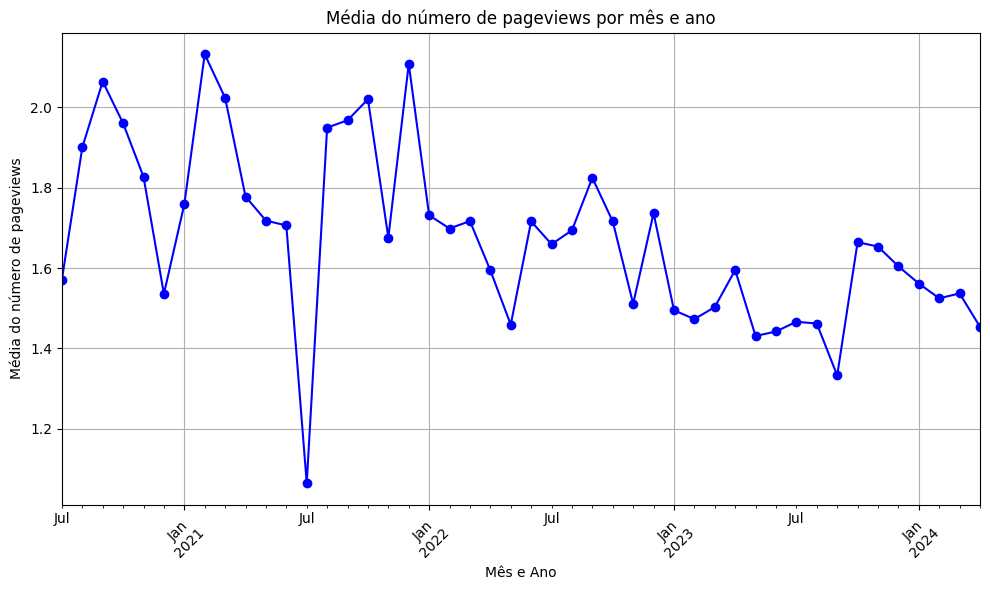

In [ ]:
df_hubspot_data['Month_Year'] = pd.to_datetime(df_hubspot_data['Became a Lead Date']).dt.to_period('M')

average_pageviews_by_month_year = df_hubspot_data.groupby('Month_Year')['Average Pageviews'].mean()

plt.figure(figsize=(10, 6))
average_pageviews_by_month_year.plot(kind='line', marker='o', color='b')
plt.title('Média do número de pageviews por mês e ano')
plt.xlabel('Mês e Ano')
plt.ylabel('Média do número de pageviews')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Campanha

In [ ]:
df_hubspot_data['Month_Year'] = pd.to_datetime(df_hubspot_data['Became a Lead Date']).dt.to_period('M')

campaign_counts_by_month_year = df_hubspot_data.groupby(['Month_Year', 'campanha']).size()

print("Número de ocorrências de cada campanha por mês e ano:")
print(campaign_counts_by_month_year)

Número de ocorrências de cada campanha por mês e ano:
Month_Year  campanha                 
2020-07     Nenhuma                        1
            Wizard_On                      6
2020-08     CampanhaWizardOnQ12024         1
            Campanha_WizardOn_Q1_2024      7
            Nenhuma                        1
                                        ... 
2024-04     4AulasGratisWizKids            2
            CampanhaWizKidsQ12024          2
            CampanhaWizardOnQ12024        30
            Campanha_WizardOn_Q1_2024    875
            testedeingles2023              3
Length: 453, dtype: int64


##Sessions

In [ ]:
df_hubspot_data['Month_Year'] = pd.to_datetime(df_hubspot_data['Became a Lead Date']).dt.to_period('M')

average_sessions_by_month_year = df_hubspot_data.groupby('Month_Year')['Number of Sessions'].mean()
print("Média do número de number of sessions por mês e ano:")
print(average_sessions_by_month_year)

Média do número de number of sessions por mês e ano:
Month_Year
2020-07     8.571429
2020-08     6.614286
2020-09     8.021277
2020-10     6.000000
2020-11     4.826923
2020-12     6.785714
2021-01     5.241379
2021-02     6.657895
2021-03    10.534884
2021-04     6.000000
2021-05     5.794872
2021-06     3.970588
2021-07     5.413043
2021-08     5.144928
2021-09     5.239130
2021-10     7.564356
2021-11     4.909910
2021-12     4.376344
2022-01     4.596639
2022-02     5.420339
2022-03     4.858407
2022-04     8.101449
2022-05     5.395349
2022-06     6.290323
2022-07     6.632959
2022-08     5.556180
2022-09     4.537634
2022-10     1.977460
2022-11     1.865342
2022-12     2.033210
2023-01     2.015775
2023-02     2.288328
2023-03     2.314493
2023-04     2.279710
2023-05     2.426066
2023-06     2.066311
2023-07     1.742429
2023-08     1.759076
2023-09     2.086990
2023-10     1.718512
2023-11     1.703988
2023-12     1.587873
2024-01     1.720917
2024-02     1.701898
2024-03     

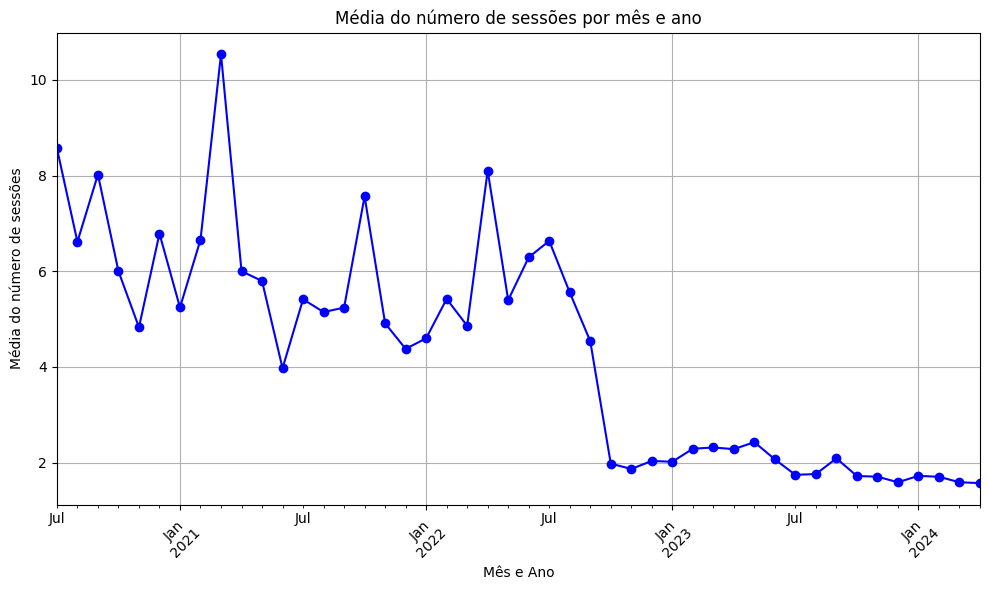

In [ ]:
plt.figure(figsize=(10, 6))
average_sessions_by_month_year.plot(kind='line', marker='o', color='b')
plt.title('Média do número de sessões por mês e ano')
plt.xlabel('Mês e Ano')
plt.ylabel('Média do número de sessões')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Leads

In [ ]:
df_hubspot_data['Month_Year'] = pd.to_datetime(df_hubspot_data['Became a Lead Date']).dt.to_period('M')

leads_count_by_month_year = df_hubspot_data.groupby('Month_Year').size()

print("Número de leads por mês e ano:")
print(leads_count_by_month_year)

Número de leads por mês e ano:
Month_Year
2020-07       7
2020-08      70
2020-09      47
2020-10      50
2020-11      52
2020-12      28
2021-01      29
2021-02      38
2021-03      43
2021-04      18
2021-05      39
2021-06      34
2021-07      46
2021-08     138
2021-09      92
2021-10     101
2021-11     111
2021-12      93
2022-01     238
2022-02     295
2022-03     226
2022-04     138
2022-05     172
2022-06     155
2022-07     267
2022-08     356
2022-09     279
2022-10    1819
2022-11    1812
2022-12    1355
2023-01    3867
2023-02    3607
2023-03    3167
2023-04    2617
2023-05    3307
2023-06    3559
2023-07    3137
2023-08    3333
2023-09    2598
2023-10    3414
2023-11    1304
2023-12     973
2024-01    1788
2024-02    2687
2024-03    4163
2024-04     921
Freq: M, dtype: int64


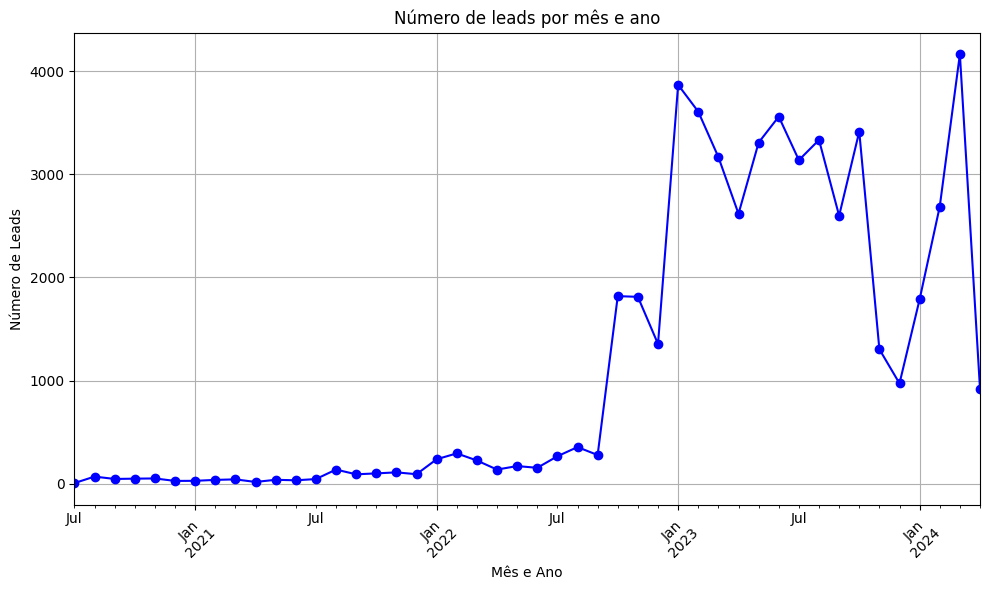

In [ ]:
df_hubspot_data['Month_Year'] = pd.to_datetime(df_hubspot_data['Became a Lead Date']).dt.to_period('M')

leads_count_by_month_year = df_hubspot_data.groupby('Month_Year').size()

plt.figure(figsize=(10, 6))
leads_count_by_month_year.plot(kind='line', marker='o', color='b')
plt.title('Número de leads por mês e ano')
plt.xlabel('Mês e Ano')
plt.ylabel('Número de Leads')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_hubspot_data.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52849 entries, 0 to 52848
Data columns (total 47 columns):
 #   Column                                                                    Non-Null Count  Dtype    
---  ------                                                                    --------------  -----    
 0   Record ID                                                                 52849 non-null  int64    
 1   Average Pageviews                                                         52849 non-null  int64    
 2   Became a Lead Date                                                        52590 non-null  object   
 3   Became a Marketing Qualified Lead Date                                    47545 non-null  object   
 4   campanha                                                                  52409 non-null  object   
 5   campanha_id                                                               52849 non-null  int64    
 6   Contrato ID                                   

##Correlação e relações

Na análise dos dados fornecidos, enfrentamos desafios significativos para estabelecer correlações robustas, principalmente devido à falta de variáveis comuns ou identificadores únicos que permitam associações claras entre os conjuntos de dados. A única variável que possibilita alguma forma de relação é a quantidade de sessões, mas isso ainda limita a profundidade e a precisão das inferências possíveis. Sem a certeza proporcionada por dados mais integrados ou identificadores consistentes, qualquer tentativa de correlacionar essas informações pode resultar em conclusões enviesadas. Portanto, é essencial proceder com cautela na interpretação dos dados para evitar análises que possam ser fundamentadas em suposições inadequadas.

Com os dados do hubspot conseguimos plotar uma matriz de correlação e obter alguns insights sobre as variavés mais importantes do conjunto

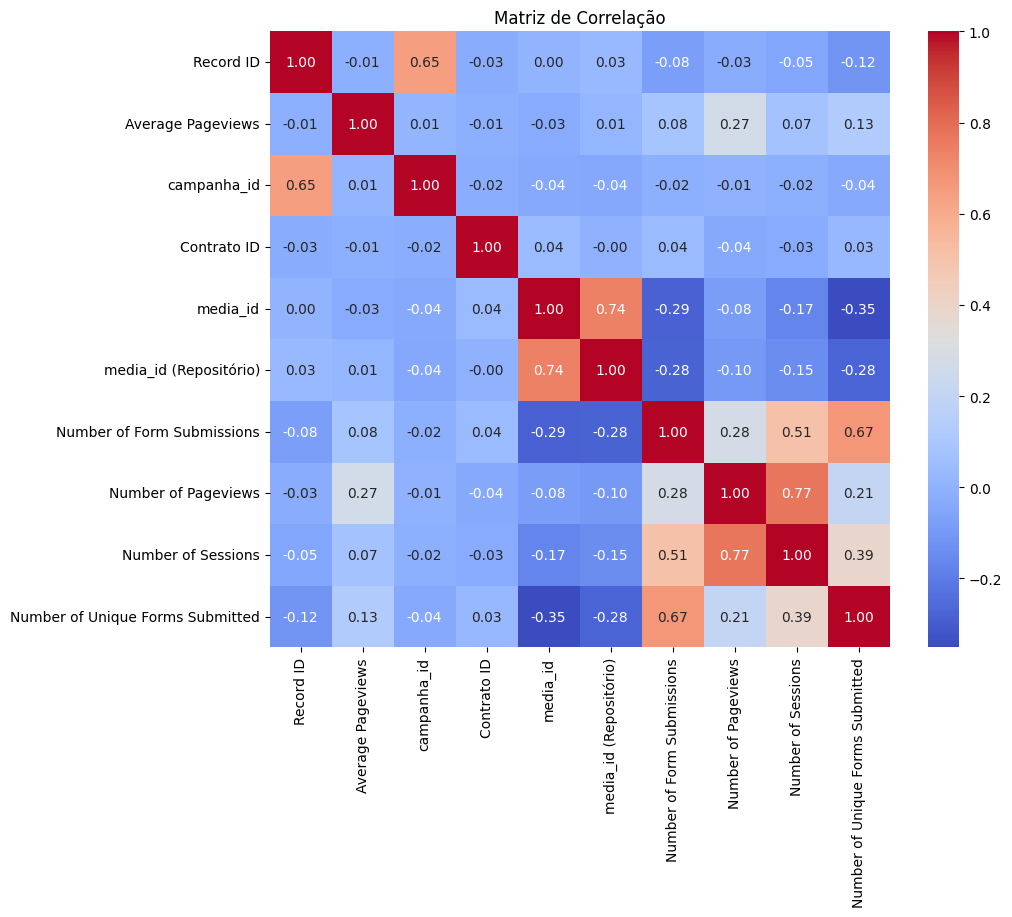

In [ ]:

# Convertendo colunas de data em timestamp Unix (segundos desde 1970-01-01)
df_numeric = df_hubspot_data.select_dtypes(include=[np.number])

# Calculando a matriz de correlação das colunas numéricas
corr_matrix = df_numeric.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlação')
plt.show()


##Análise Estatistica

A tabela de acessos às páginas contém os campos: "Page Title", "Users" e "Sessions". Essas colunas fornecem dados essenciais para análise de engajamento dos usuários com o conteúdo do site. Com base nesses dados, podemos calcular a média de sessões por usuário, o que indica quantas vezes, em média, um usuário visita uma página. Esta métrica é fundamental para entender a frequência de interação dos usuários com as páginas específicas e avaliar o interesse gerado pelo conteúdo disponibilizado.

In [ ]:

df_ga_universal_2023['media_sessoes_por_user'] = df_ga_universal_2023['Sessions'] / df_ga_universal_2023['Users'].round(5)
df_ga_universal_2023.sort_values('media_sessoes_por_user', ascending=False)


,Page Title,Users,Sessions,media_sessoes_por_user
8,Catch Up,201,1485,7.388060
37,Wizard On [url=https://promocoes.wizard.com.br...,11,22,2.000000
35,Textos em inglês para iniciantes - Wizard Idiomas,11,22,2.000000
32,"Escola de Idiomas em Guaratinguetá, Vila Parai...",11,22,2.000000
25,35 hits dos anos 2000 para aprender inglês - W...,22,34,1.545455
...,...,...,...,...
102,Wizard Osasco Jardim Santo Antonio – Wizard Id...,11,0,0.000000
101,"Wizkids - Escola de Idiomas em Valinhos, Jardi...",11,0,0.000000
99,"Escola de Idiomas em Aracaju, 13 de Julho, SE ...",11,0,0.000000
98,"Curso de Inglês em Novo Hamburgo, Hamburgo Vel...",11,0,0.000000


In [ ]:
soma_active_users = df_hour_users_big_numbers_2023['Active users'].sum()
print("Soma de Active users:", soma_active_users)

Soma de Active users: 1915926


In [ ]:
df_hour_users_big_numbers_2023_desc = df_hour_users_big_numbers_2023.describe()
print(df_hour_users_big_numbers_2023_desc)

            Hour  Active users
count  24.000000      24.00000
mean   11.500000   79830.25000
std     7.071068   42936.38994
min     0.000000    9616.00000
25%     5.750000   47705.75000
50%    11.500000   90496.50000
75%    17.250000  107178.50000
max    23.000000  143411.00000


In [ ]:
filtro_brazil = df_users_country_big_numbers_geo_2023['Country'] == 'Brazil'
active_users_brazil = df_users_country_big_numbers_geo_2023.loc[filtro_brazil, 'Active users']
print ("Brasil:", active_users_brazil.item())

active_users_not_brazil = (soma_active_users - active_users_brazil)
print ("Não Brasil:", active_users_not_brazil.item())

Brasil: 1434957
Não Brasil: 480969


## Visualização de dados

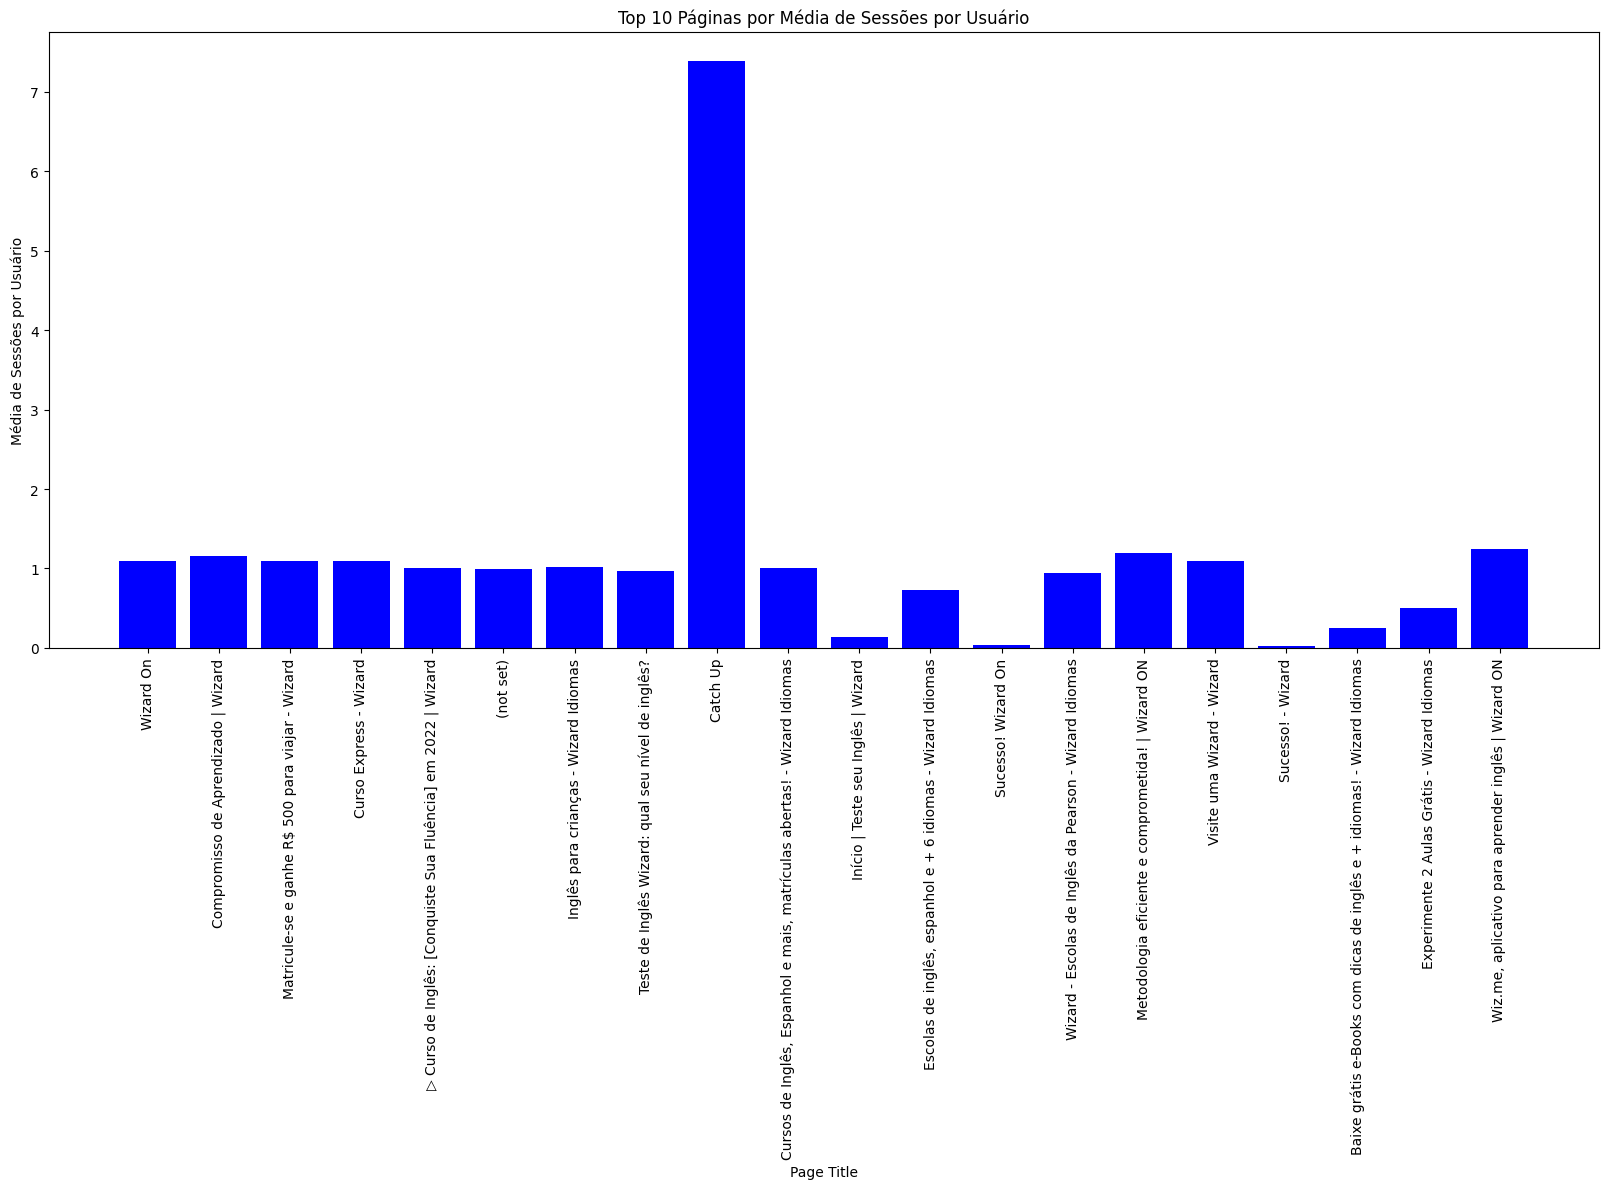

In [ ]:

plt.figure(figsize=(20, 8))  # Ajuste o tamanho conforme necessário
plt.bar(df_ga_universal_2023['Page Title'][:20], df_ga_universal_2023['media_sessoes_por_user'][:20], color='blue')  # Limitar a visualização às 10 maiores médias
plt.xlabel('Page Title')
plt.ylabel('Média de Sessões por Usuário')
plt.title('Top 10 Páginas por Média de Sessões por Usuário')
plt.xticks(rotation=90)
plt.show()


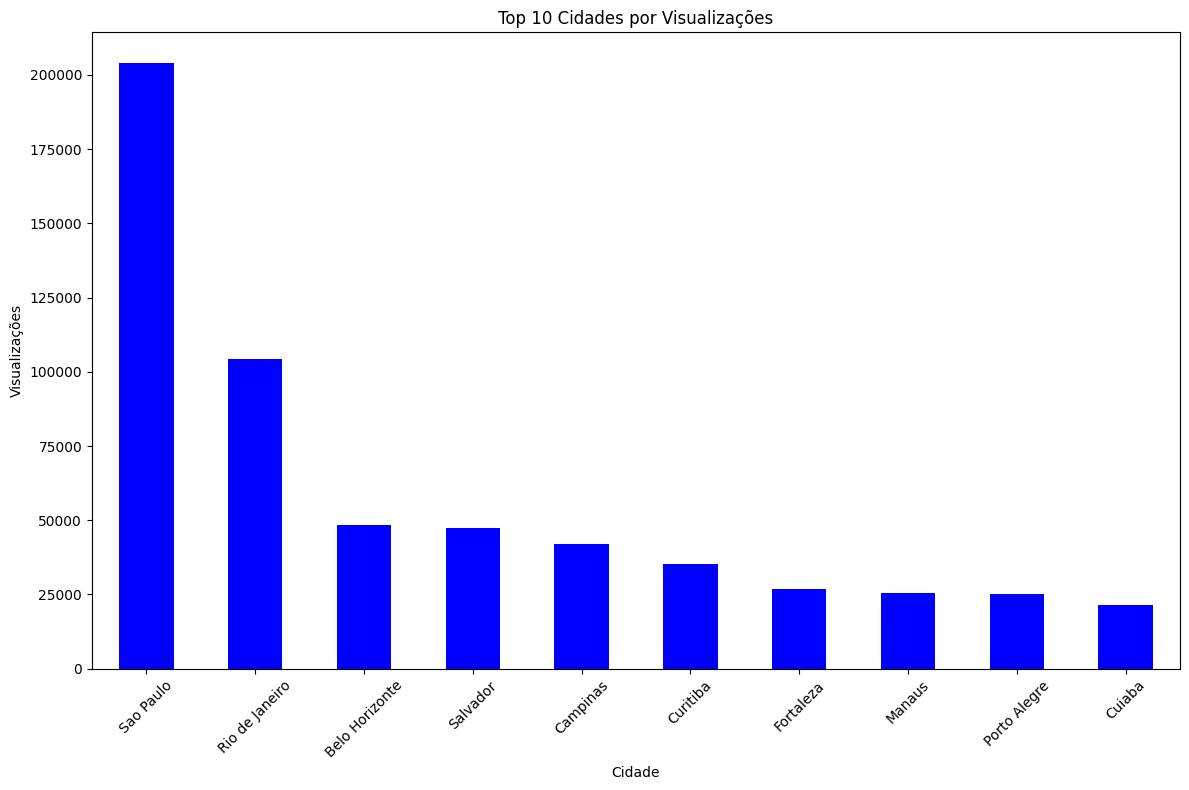

In [ ]:

# Filtrar para excluir cidades não especificadas
df_filtered = df_country_city_views_big_numbers_2023[df_country_city_views_big_numbers_2023['City'] != '(not set)']
# Agrupar por cidade e somar as visualizações
city_views = df_filtered.groupby('City')['Views'].sum().nlargest(10)

# Criar um gráfico de barras para as 10 cidades com mais visualizações
plt.figure(figsize=(12, 8))
city_views.plot(kind='bar', color='blue')
plt.title('Top 10 Cidades por Visualizações')
plt.xlabel('Cidade')
plt.ylabel('Visualizações')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

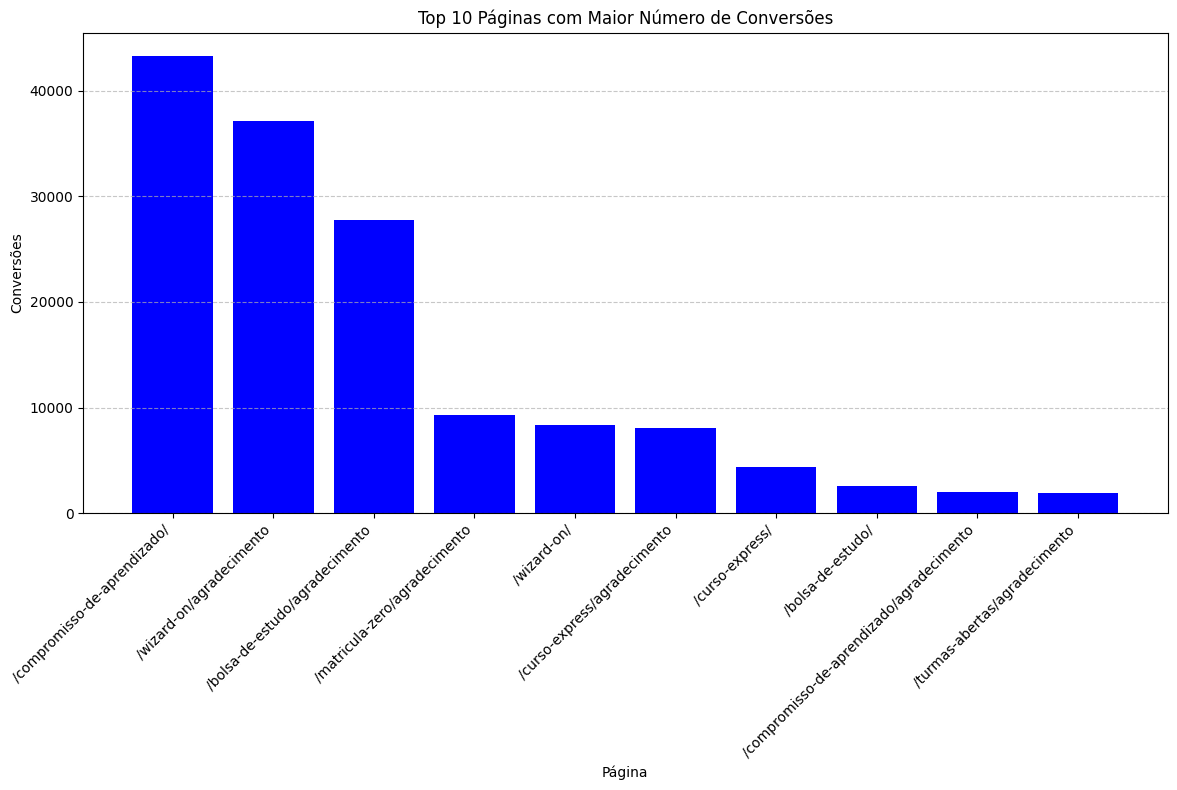

In [ ]:
# Certifique-se de que as colunas 'Sessions' e 'Conversions' estão no tipo correto
df_acessos_geral_2023['Sessions'] = pd.to_numeric(df_acessos_geral_2023['Sessions'], errors='coerce')
df_acessos_geral_2023['Conversions'] = pd.to_numeric(df_acessos_geral_2023['Conversions'], errors='coerce')

top_conversions = df_acessos_geral_2023.sort_values('Conversions', ascending=False).head(10)


# Criando o gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(top_conversions['Page path and screen class'], top_conversions['Conversions'], color='blue')
plt.title('Top 10 Páginas com Maior Número de Conversões')
plt.xlabel('Página')
plt.ylabel('Conversões')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Transformação de dados

Aqui podemos gerar IDs para paises e para cidades, dessa forma, conseguimos trabalhar com eles em forma númerica e colcoar em algoritimos matematicos

In [ ]:
# Gerar IDs para países
df_country_city_views_big_numbers_2023['Country_ID'] = pd.factorize(df_country_city_views_big_numbers_2023['Country'])[0]

# Gerar IDs para cidades dentro do contexto de cada país
df_country_city_views_big_numbers_2023['City_ID'] = df_country_city_views_big_numbers_2023.groupby('Country')['City'].transform(lambda x: pd.factorize(x)[0])


#Pipeline de tratamento

Tratamentos:
Remoção de dados nulos
Remoção de dados duplicados
Remoção de caractéres especiais
Remoção de valores menores que 25

In [ ]:
def preprocess_data(df):
    # Tratamento de dados nulos
    df = df.dropna()

    # Tratamento de caracteres especiais
    df = df.applymap(lambda x: re.sub(r'[^\x00-\x7F]+', '', str(x)))

    # Tratamento de dados duplicados
    df = df.drop_duplicates()

    # Tratamento para dados com valor menor que 25 nas colunas numéricas
    numeric_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        if df[col].dtype == 'float64':
            df = df[df[col] >= 25]

    return df

# df_ga_universal_2023
df_ga_universal_2023_processed = preprocess_data(df_ga_universal_2023)

# df_acessos_geral_2023
df_acessos_geral_2023_processed = preprocess_data(df_acessos_geral_2023)

# df_country_city_views_big_numbers_2023
df_country_city_views_big_numbers_2023_processed = preprocess_data(df_country_city_views_big_numbers_2023)

# df_users_country_big_numbers_geo_2023
df_users_country_big_numbers_geo_2023_processed = preprocess_data(df_users_country_big_numbers_geo_2023)

# Conclusão

Este relatório de análise exploratória proporcionou insights importantes sobre o comportamento dos usuários e a eficácia das estratégias de marketing digital empregadas no site. Identificamos que a maioria dos eventos é realizada por usuários em dispositivos Android, indicando a necessidade de uma otimização focada nesta plataforma para melhorar a experiência do usuário e aumentar a eficiência das campanhas de marketing.

A análise também revelou uma predominância na distribuição de eventos por sistema operacional, o que nos orienta a priorizar iniciativas de desenvolvimento e marketing que se alinhem às plataformas mais utilizadas. Embora a segmentação por faixa etária tenha apresentado lacunas, os dados disponíveis fornecem uma base sólida para desenvolver estratégias de marketing mais direcionadas.

No entanto, a análise foi parcialmente limitada pelo envio tardio de algumas bases de dados, o que impediu uma avaliação completa de todos os aspectos relevantes. Para futuras análises, é crucial garantir a disponibilidade completa dos dados no início do processo, permitindo uma compreensão mais profunda e uma aplicação mais eficaz das estratégias de marketing.

As transformações e tratamentos aplicados aos dados permitiram a inserção dos mesmos em modelos matemáticos e algoritmos de previsão, melhorando significativamente nossa capacidade de prever tendências e ajustar as estratégias em tempo real. A continuidade deste trabalho e a integração completa dos dados pendentes serão essenciais para aprimorar ainda mais nossas análises e resultados.
